<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_3_Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [2]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [3]:
print(attributes_spotify)

      Unnamed: 0  ...            artist
0              0  ...            Future
1              1  ...  Childish Gambino
2              2  ...            Future
3              3  ...       Beach House
4              4  ...       Junior Boys
...          ...  ...               ...
2012        2012  ...    Kill The Noise
2013        2013  ...    Dillon Francis
2014        2014  ...          Rain Man
2015        2015  ...        Twin Moons
2016        2016  ...         Bleachers

[2017 rows x 17 columns]


In [4]:
print(attributes_spotify.columns)
print(attributes_spotify.target)


Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')
0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64


In [6]:
print(attributes_spotify.iloc[:,0]) # Unnamed: 0   Es un numerador de las canciones


0          0
1          1
2          2
3          3
4          4
        ... 
2012    2012
2013    2013
2014    2014
2015    2015
2016    2016
Name: Unnamed: 0, Length: 2017, dtype: int64


**Análisis de las variables individuales**

Quiero analizar cada variable y saber si es determinante para que a la persona le guste la canción o no.

Grafico el gusto en función de la variable, y si se encuentran bien distinguidas zonas de gusto y disgusto, puedo definir un umbral para esa variable a partir de la cual a la persona le gusta o no el tema.

In [30]:
print(attributes_spotify.iloc[:,1]) # acousticness   Es un numerador de las canciones

plt.plot(attributes_spotify.acousticness,attributes_spotify.target ,'mo',label='Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()


positive=0
negative=0
for i in np.arange(0,attribute_spotify.target):



SyntaxError: ignored

Al parece la acústica de la canción no es un factor definitorio de si le gusta o no la canción. Le gustan temas con mucha y con poca acústica.

0       0.833
1       0.743
2       0.838
3       0.494
4       0.678
        ...  
2012    0.584
2013    0.894
2014    0.637
2015    0.557
2016    0.446
Name: danceability, Length: 2017, dtype: float64


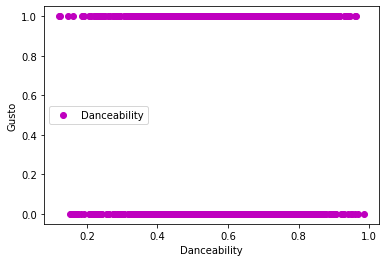

In [29]:
print(attributes_spotify.iloc[:,2]) # danceability   Que tan bailable es el tema

plt.plot(attributes_spotify.danceability,attributes_spotify.target ,'mo',label='Danceability')
plt.xlabel('Danceability')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

Al parece que tan bailable es una canción no es un factor definitorio de si le gusta o no la canción. Le gustan temas muy bailables y poco bailables.

0       204600
1       326933
2       185707
3       199413
4       392893
         ...  
2012    274404
2013    182182
2014    207200
2015    185600
2016    204520
Name: duration_ms, Length: 2017, dtype: int64


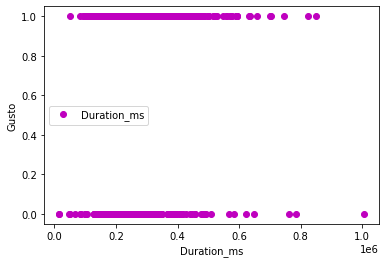

In [28]:
print(attributes_spotify.iloc[:,3]) # duration_ms   Duración en microsegundos

plt.plot(attributes_spotify.duration_ms,attributes_spotify.target ,'mo',label='Duration_ms')
plt.xlabel('Duration_ms')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

La duración no parece ser parametro determinante individual.

0       0.434
1       0.359
2       0.412
3       0.338
4       0.561
        ...  
2012    0.932
2013    0.892
2014    0.935
2015    0.992
2016    0.915
Name: energy, Length: 2017, dtype: float64


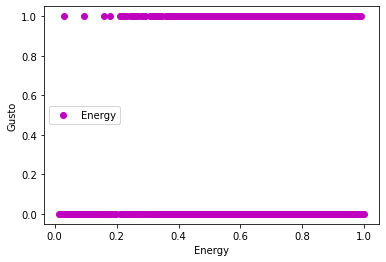

In [27]:
print(attributes_spotify.iloc[:,4]) # energy   Es un numerador de las canciones

plt.plot(attributes_spotify.energy,attributes_spotify.target ,'mo',label='Energy')
plt.xlabel('Energy')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

0       0.021900
1       0.006110
2       0.000234
3       0.510000
4       0.512000
          ...   
2012    0.002690
2013    0.001670
2014    0.003990
2015    0.677000
2016    0.000039
Name: instrumentalness, Length: 2017, dtype: float64


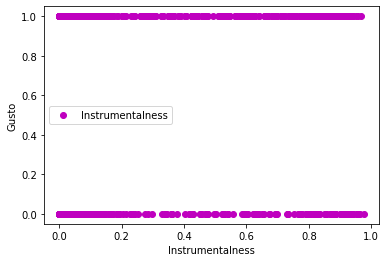

In [26]:
print(attributes_spotify.iloc[:,5]) # 'instrumentalness'  Que tan instrumental es la canción

plt.plot(attributes_spotify.instrumentalness,attributes_spotify.target ,'mo',label='Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

Que tan instrumental es la canción no parece ser parametro determinante individual.

0       2
1       1
2       2
3       5
4       5
       ..
2012    1
2013    1
2014    0
2015    1
2016    9
Name: key, Length: 2017, dtype: int64


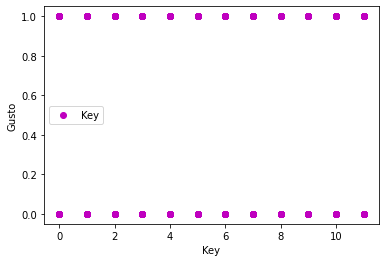

In [25]:
print(attributes_spotify.iloc[:,6]) # 'key'  
plt.plot(attributes_spotify.key,attributes_spotify.target ,'mo',label='Key')
plt.xlabel('Key')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

No sé que representa el parámetro key, pero no es factor determinante individual.

0       0.1650
1       0.1370
2       0.1590
3       0.0922
4       0.4390
         ...  
2012    0.1290
2013    0.0528
2014    0.2140
2015    0.0913
2016    0.2180
Name: liveness, Length: 2017, dtype: float64


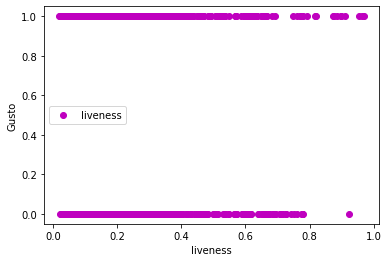

In [24]:
print(attributes_spotify.iloc[:,7]) # liveness 

plt.plot(attributes_spotify.liveness,attributes_spotify.target ,'mo',label='liveness')
plt.xlabel('liveness')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

No hay una clara definición, pero pareciera que si el liveness se encuentra entre lo valores mas altos, es mas probable que la canción le guste.

0       -8.795
1      -10.401
2       -7.148
3      -15.236
4      -11.648
         ...  
2012    -3.501
2013    -2.663
2014    -2.467
2015    -2.735
2016    -6.221
Name: loudness, Length: 2017, dtype: float64


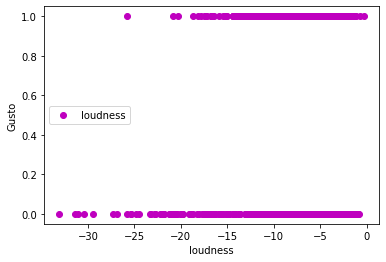

Número de disgustos para loudness<-18: 41
Número de gustos para loudness<-18: 5


In [62]:
print(attributes_spotify.iloc[:,8]) # loudness 

plt.plot(attributes_spotify.loudness,attributes_spotify.target ,'mo',label='loudness')
plt.xlabel('loudness')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

count_negative=0
count_positive=0
for i in np.arange(0,attributes_spotify.time_signature.size):
  if attributes_spotify.loudness[i]<-18 and attributes_spotify.target[i]==0:
    count_negative=count_negative+1
  if attributes_spotify.loudness[i]<-18 and attributes_spotify.target[i]==1:
    count_positive=count_positive+1
print('Número de disgustos para loudness<-18:',count_negative)
print('Número de gustos para loudness<-18:',count_positive)

Si el loudness es muy bajo(alto valor negativo) es mas probable que el tema no guste.

Para loudness menor a -25.8 todas las canciones le digustan.

Para loudness bajos, es mas probable que no guste la canción.

Tengo que ver si puedo encontrar un valor umbral a partir del cual saber que la canción no va a gustar. Por encima de ese valor umbral no podría decir nada.

-25.756
0.3064516129032258


Text(0.5, 1.0, 'Knn neighbors --- k=1')

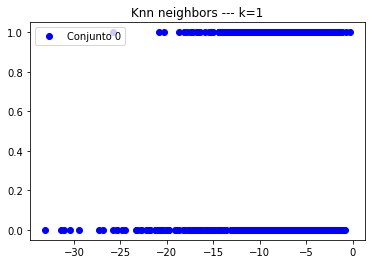

In [78]:
loudness_positive=np.zeros(int(attributes_spotify.loudness.size))
m=0
for i in np.arange(0,attributes_spotify.loudness.size):
  if attributes_spotify.target[i]==1:
    loudness_positive[m]=attributes_spotify.loudness[i]
    m=m+1
print(loudness_positive.min())

relaciones=np.zeros(int(np.absolute(10*loudness_positive.min()+15)/0.1))
for i in np.arange(loudness_positive.min(),-15,0.1):
  count_positive=0
  count_negative=0
  umbral=i
  for j in np.arange(0,attributes_spotify.loudness.size):
    if attributes_spotify.loudness[j]<umbral:
      if attributes_spotify.target[j]==1:
        count_positive=count_positive+1
      if attributes_spotify.target[j]==0:
        count_negative=count_negative+1
  index=10*i
  relaciones[int(index)]=count_positive/count_negative

print(relaciones.max())

for i in np.arange
h = .01  # step size in the mesh

x_min, x_max = attributes_spotify.loudness.min() - 1, attributes_spotify.loudness.max() + 1
y_min, y_max =attributes_spotify.target.min() - 0.2, attributes_spotify.target.max() + 0.2

#Creo la tabla de grillado para luego pintarla con las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
#z = z.reshape(xx.shape)


plt.figure()
#plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(attributes_spotify.loudness,attributes_spotify.target,'bo',label='Conjunto 0')
#plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=1')


0       1
1       1
2       1
3       1
4       0
       ..
2012    1
2013    1
2014    1
2015    1
2016    1
Name: mode, Length: 2017, dtype: int64


ValueError: ignored

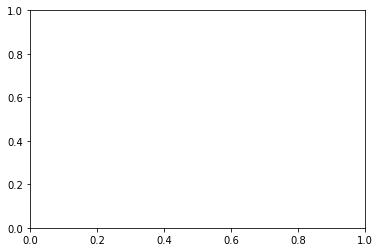

In [32]:
print(attributes_spotify.iloc[:,9]) # mode 

plt.plot(attributes_spotify.mode ,attributes_spotify.target ,'mo',label='mode')
plt.xlabel('mode')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

0       0.4310
1       0.0794
2       0.2890
3       0.0261
4       0.0694
         ...  
2012    0.3330
2013    0.1310
2014    0.1070
2015    0.1330
2016    0.1410
Name: speechiness, Length: 2017, dtype: float64


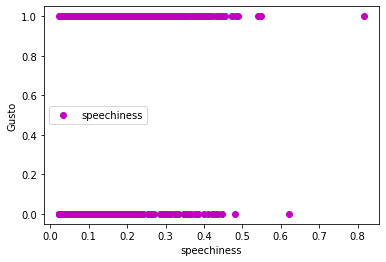

In [80]:
print(attributes_spotify.iloc[:,10]) # speechiness

plt.plot(attributes_spotify.speechiness ,attributes_spotify.target ,'mo',label='speechiness')
plt.xlabel('speechiness')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
         ...   
2012     74.976
2013    110.041
2014    150.082
2015    150.011
2016    190.013
Name: tempo, Length: 2017, dtype: float64


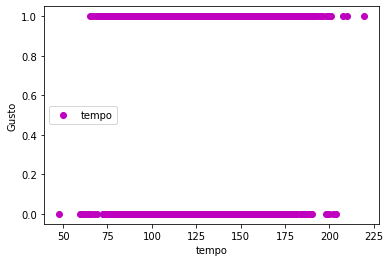

In [40]:
print(attributes_spotify.iloc[:,11]) # tempo

plt.plot(attributes_spotify.tempo ,attributes_spotify.target ,'mo',label='tempo')
plt.xlabel('tempo')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
2012    4.0
2013    4.0
2014    4.0
2015    4.0
2016    4.0
Name: time_signature, Length: 2017, dtype: float64


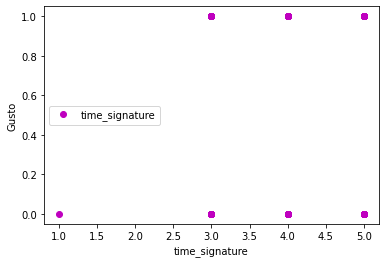

1


In [43]:
print(attributes_spotify.iloc[:,12]) # time_signature

plt.plot(attributes_spotify.time_signature ,attributes_spotify.target ,'mo',label='time_signature')
plt.xlabel('time_signature')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

count=0
for i in np.arange(0,attributes_spotify.time_signature.size):
  if attributes_spotify.time_signature[i]<2.5:
    count=count+1
print(count)

Uno podría decir que para un time_signature menor a 3, o por lo menos ocn valor uno implica que no va a gustar, pero solo hay una canción con time_signature=1, entonces no puede asumir esa conjetura.

0       0.286
1       0.588
2       0.173
3       0.230
4       0.904
        ...  
2012    0.211
2013    0.867
2014    0.470
2015    0.623
2016    0.402
Name: valence, Length: 2017, dtype: float64


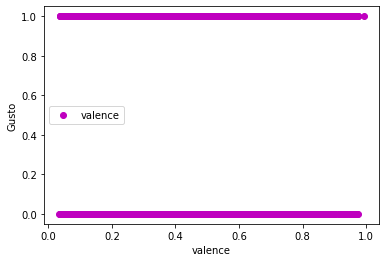

In [44]:
print(attributes_spotify.iloc[:,13]) # valence

plt.plot(attributes_spotify.valence ,attributes_spotify.target ,'mo',label='valence')
plt.xlabel('valence')
plt.ylabel('Gusto')
plt.legend(loc='center left')
plt.show()

In [47]:
print(attributes_spotify.iloc[:,15]) # song_title



0                                   Mask Off
1                                    Redbone
2                               Xanny Family
3                             Master Of None
4                             Parallel Lines
                        ...                 
2012     Like A Bitch - Kill The Noise Remix
2013                                   Candy
2014    Habit - Dack Janiels & Wenzday Remix
2015                           First Contact
2016                      I Wanna Get Better
Name: song_title, Length: 2017, dtype: object


In [48]:
print(attributes_spotify.iloc[:,16]) # song_title



0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object


In [79]:
print(attributes_spotify.iloc[:,14])

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64


**Análisis de todas las variable juntas**

Quiero utilizar vecinos mas cercanos para ver si con eso puedo predecir los gustos de la persona o no, utilizando todos los datos de la tabla como entrada

In [113]:
attributes=np.zeros((attributes_spotify.target.size,12))

for i in np.arange(0,12):
  attributes[:,i]=attributes_spotify.iloc[:,i+2]

#for i in np.arange(6,12):
 # attributes[:,i]=attributes_spotify.iloc[:,i+2]


44.91102314577124
Sensibilidad: 0.5495750708215298
Presicion: 0.6554054054054054
Exactitud: 0.5693069306930693
Fall_out: 0.4031620553359684


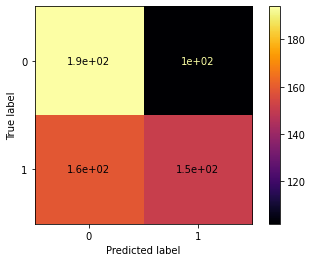

In [114]:
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(attributes,attributes_spotify.target, test_size=0.3,random_state=42)
print(np.sqrt(attributes_spotify.target.size))
knn = neighbors.KNeighborsClassifier(n_neighbors=int(round(np.sqrt(attributes_spotify.target.size))))
knn.fit(x_train,y_train)
disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

**Análisis de a pares**

Intento ver si puedo ver si dos propiedades estan relacionadas, para ello voy a tratar de ver como son la presición, exactitud y sensibilidad utilizando vecinos mas cercanos analizando de a dos propiedades.

34289
2017
17.0
44.91102314577124
Sensibilidad: 0.5495750708215298
Presicion: 0.6554054054054054
Exactitud: 0.5693069306930693
Fall_out: 0.4031620553359684

44.91102314577124
Sensibilidad: 0.5956112852664577
Presicion: 0.6418918918918919
Exactitud: 0.6122112211221122
Fall_out: 0.3693379790940767

44.91102314577124
Sensibilidad: 0.5901639344262295
Presicion: 0.7297297297297297
Exactitud: 0.6204620462046204
Fall_out: 0.3333333333333333

44.91102314577124
Sensibilidad: 0.528023598820059
Presicion: 0.6047297297297297
Exactitud: 0.5429042904290429
Fall_out: 0.43820224719101125

44.91102314577124
Sensibilidad: 0.5801749271137027
Presicion: 0.6722972972972973
Exactitud: 0.6023102310231023
Fall_out: 0.3688212927756654

44.91102314577124
Sensibilidad: 0.6440677966101694
Presicion: 0.6418918918918919
Exactitud: 0.6518151815181518
Fall_out: 0.3408360128617363

44.91102314577124
Sensibilidad: 0.5813148788927336
Presicion: 0.5675675675675675
Exactitud: 0.5891089108910891
Fall_out: 0.403785488958990

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.5777777777777777
Presicion: 0.527027027027027
Exactitud: 0.5808580858085809
Fall_out: 0.4166666666666667

44.91102314577124
Sensibilidad: 0.6298932384341637
Presicion: 0.597972972972973
Exactitud: 0.6320132013201321
Fall_out: 0.36615384615384616

44.91102314577124
Sensibilidad: 0.5510204081632653
Presicion: 0.5472972972972973
Exactitud: 0.5610561056105611
Fall_out: 0.42948717948717946

44.91102314577124
Sensibilidad: 0.5637583892617449
Presicion: 0.5675675675675675
Exactitud: 0.5742574257425742
Fall_out: 0.4155844155844156

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.5327380952380952
Presicion: 0.6047297297297297
Exactitud: 0.5478547854785478
Fall_out: 0.43333333333333335

44.91102314577124
Sensibilidad: 0.5648854961832062
Presicion: 0.5
Exactitud: 0.5676567656765676
Fall_out: 0.43023255813953487

44.91102314577124
Sensibilidad: 0.5472636815920398
Presicion: 0.7432432432432432
Exactitud: 0.5742574257425742
Fall_out: 0.37254901960784315

44.91102314577124
Sensibilidad: 0.5552763819095478
Presicion: 0.7466216216216216
Exactitud: 0.5841584158415841
Fall_out: 0.3605769230769231



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

44.91102314577124
Sensibilidad: 0.6027874564459931
Presicion: 0.5844594594594594
Exactitud: 0.6089108910891089
Fall_out: 0.38557993730407525

44.91102314577124
Sensibilidad: 0.6058631921824105
Presicion: 0.6283783783783784
Exactitud: 0.6188118811881188
Fall_out: 0.36789297658862874

44.91102314577124
Sensibilidad: 0.6515679442508711
Presicion: 0.6317567567567568
Exactitud: 0.6551155115511551
Fall_out: 0.34169278996865204

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Sensibilidad: 0.5228571428571429
Presicion: 0.6182432432432432
Exactitud: 0.5379537953795379
Fall_out: 0.44140625

44.91102314577124
Sensibilidad: 0.6086956521739131
Presicion: 0.6621621621621622
Exactitud: 0.6270627062706271
Fall_out: 0.352112676056338

44.91102314577124
Sensibilidad: 0.5061728395061729
Presicion: 0.5540540540540541
Exactitud: 0.5181518151815182
Fall_out: 0.46808510638297873

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.6174496644295302
Presicion: 0.6216216216216216
Exactitud: 0.6270627062706271
Fall_out: 0.36363636363636365

44.91102314577124
Sensibilidad: 0.49812734082397003
Presicion: 0.44932432432432434
Exactitud: 0.5099009900990099
Fall_out: 0.4808259587020649

44.91102314577124
Sensibilidad: 0.5243055555555556
Presicion: 0.5101351351351351
Exactitud: 0.5346534653465347
Fall_out: 0.4559748427672956

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.5313531353135313
Presicion: 0.543918918918919
Exactitud: 0.5429042904290429
Fall_out: 0.44554455445544555

44.91102314577124
Sensibilidad: 0.5233160621761658
Presicion: 0.34121621621621623
Exactitud: 0.5264026402640264
Fall_out: 0.4721549636803874

44.91102314577124
Sensibilidad: 0.6140939597315436
Presicion: 0.6182432432432432
Exactitud: 0.6237623762376238
Fall_out: 0.36688311688311687

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.49174917491749176
Presicion: 0.5033783783783784
Exactitud: 0.5033003300330033
Fall_out: 0.48514851485148514

44.91102314577124
Sensibilidad: 0.5337620578778135
Presicion: 0.5608108108108109
Exactitud: 0.5462046204620462
Fall_out: 0.4406779661016949

44.91102314577124
Sensibilidad: 0.5273775216138329
Presicion: 0.6182432432432432
Exactitud: 0.5429042904290429
Fall_out: 0.4362934362934363

44.91102314577124
Sensibilidad: 0.5015105740181269
Presicion: 0.5608108108108109
Exactitud: 0.5132013201320133
Fall_out: 0.4727272727272727



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

44.91102314577124
Sensibilidad: 0.6033898305084746
Presicion: 0.6013513513513513
Exactitud: 0.6122112211221122
Fall_out: 0.37942122186495175

44.91102314577124
Sensibilidad: 0.613013698630137
Presicion: 0.6047297297297297
Exactitud: 0.6204620462046204
Fall_out: 0.37261146496815284

44.91102314577124
Sensibilidad: 0.5833333333333334
Presicion: 0.6148648648648649
Exactitud: 0.5973597359735974
Fall_out: 0.3877551020408163

44.91102314577124


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Sensibilidad: 0.62890625
Presicion: 0.543918918918919
Exactitud: 0.6204620462046204
Fall_out: 0.38571428571428573

44.91102314577124
Sensibilidad: 0.5690376569037657
Presicion: 0.4594594594594595
Exactitud: 0.566006600660066
Fall_out: 0.4359673024523161

44.91102314577124
Sensibilidad: 0.5177514792899408
Presicion: 0.5912162162162162
Exactitud: 0.5313531353135313
Fall_out: 0.45149253731343286

44.91102314577124
Sensibilidad: 0.5039164490861618
Presicion: 0.652027027027027
Exactitud: 0.5165016501650165
Fall_out: 0.4618834080717489

44.91102314577124
Sensibilidad: 0.5270655270655271
Presicion: 0.625
Exactitud: 0.5429042904290429
Fall_out: 0.43529411764705883

44.91102314577124
Sensibilidad: 0.535593220338983
Presicion: 0.5337837837837838
Exactitud: 0.5462046204620462
Fall_out: 0.4437299035369775

44.91102314577124
Sensibilidad: 0.5327380952380952
Presicion: 0.6047297297297297
Exactitud: 0.5478547854785478
Fall_out: 0.43333333333333335



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

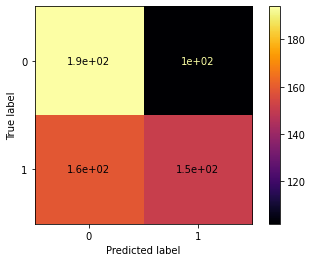

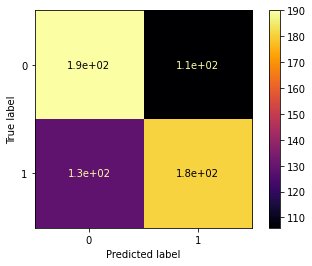

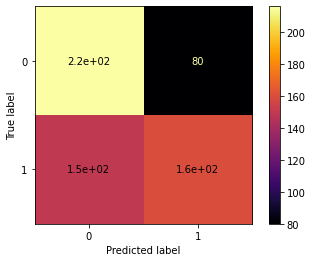

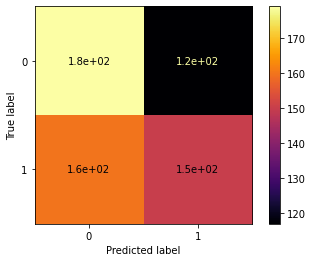

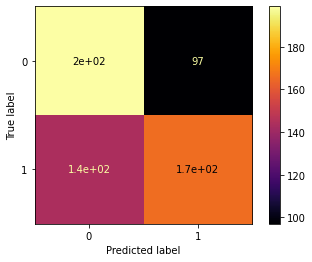

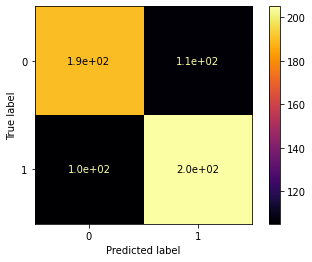

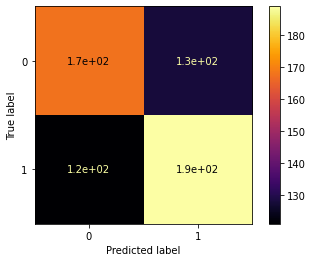

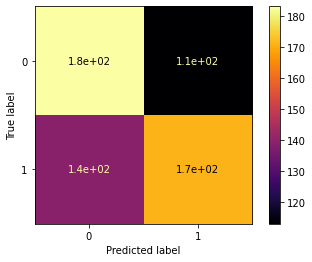

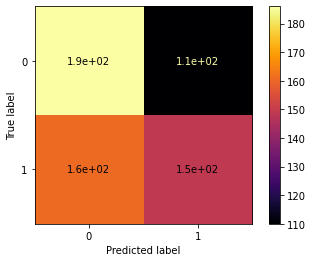

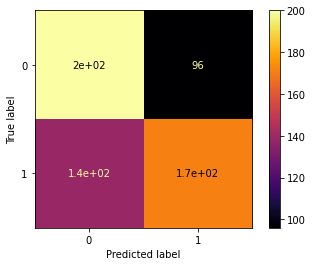

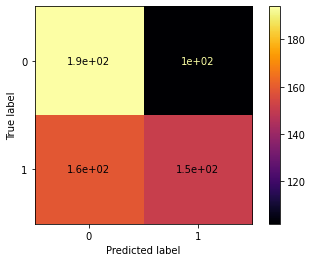

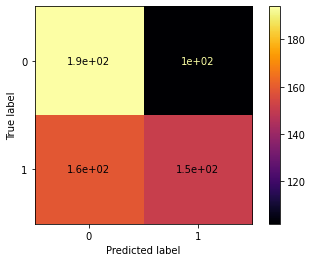

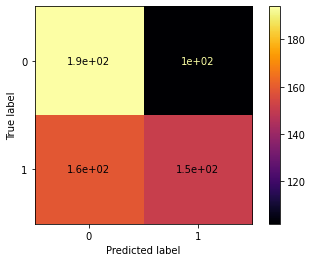

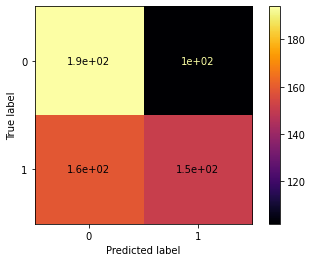

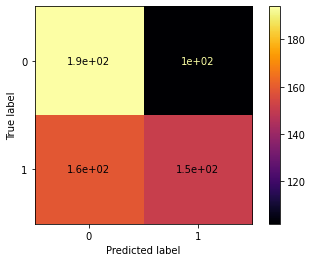

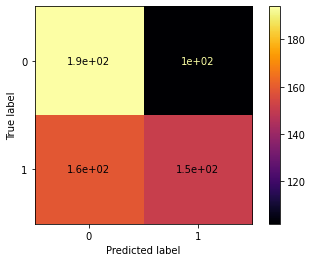

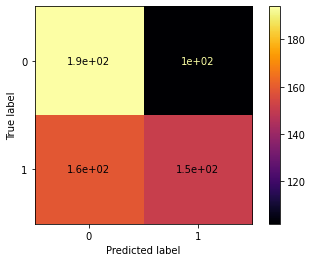

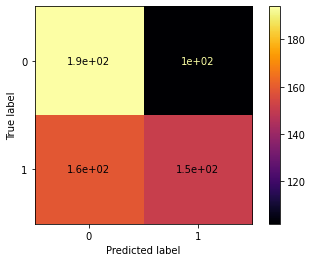

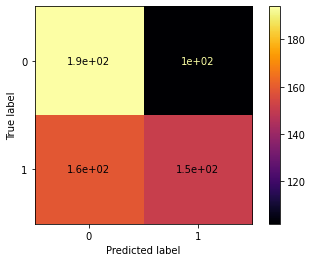

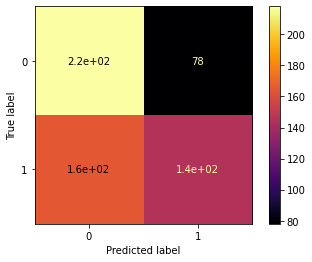

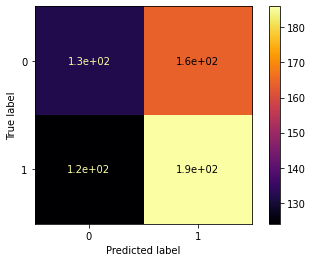

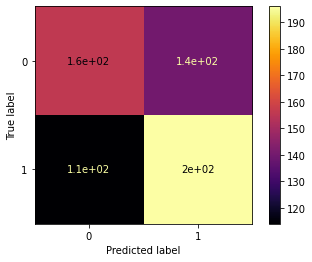

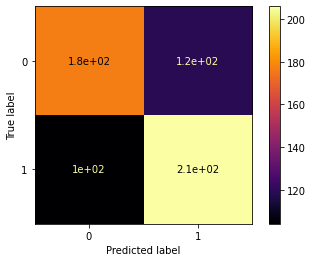

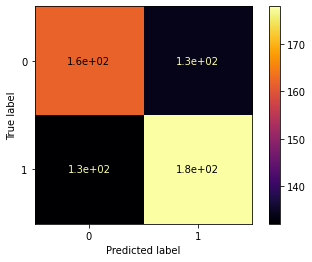

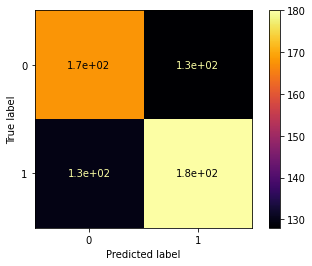

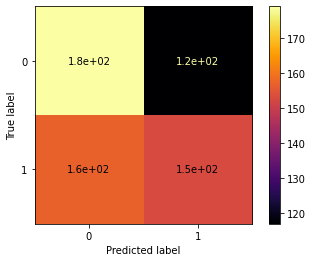

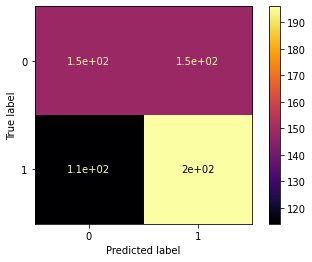

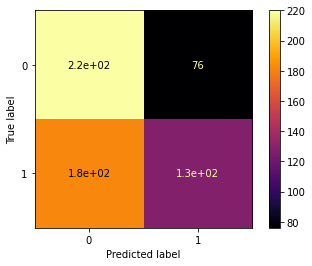

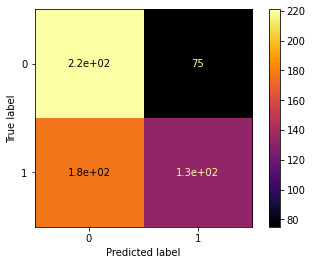

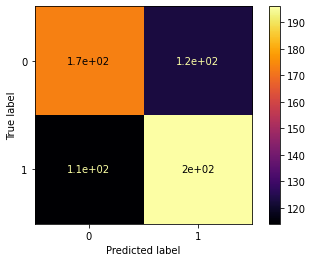

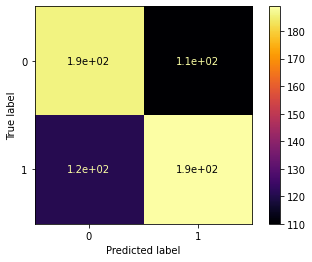

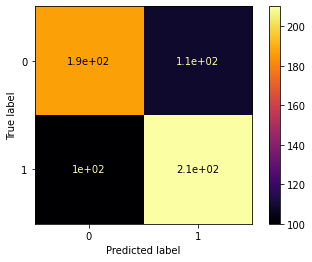

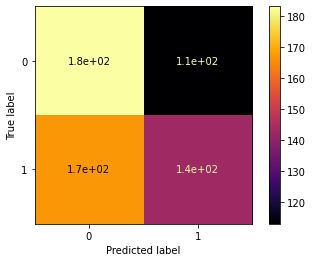

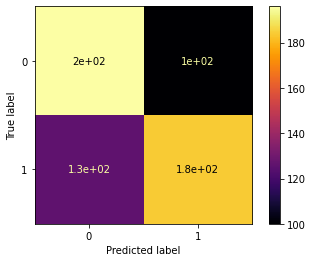

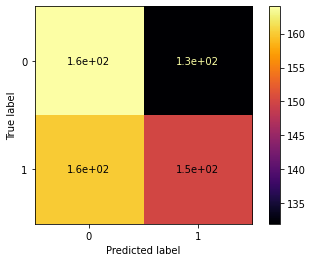

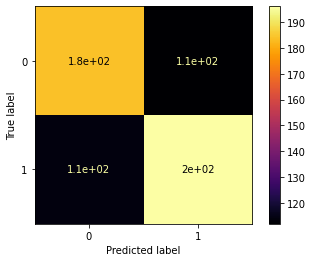

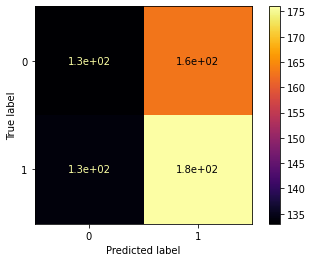

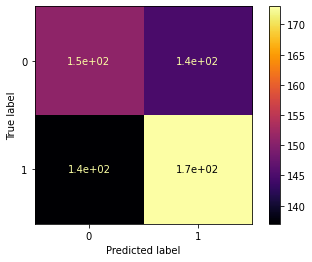

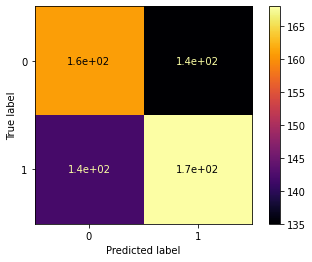

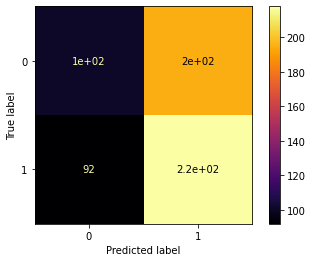

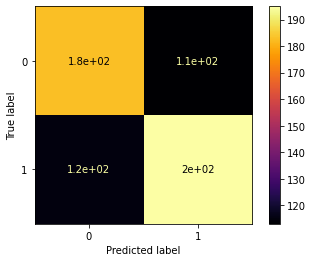

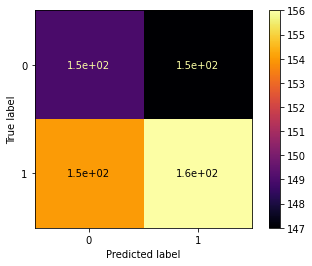

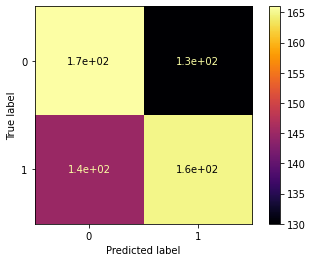

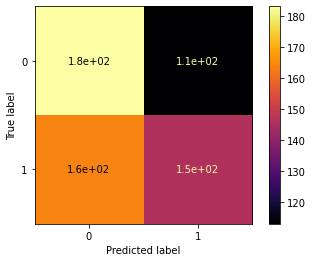

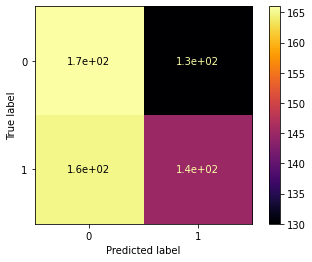

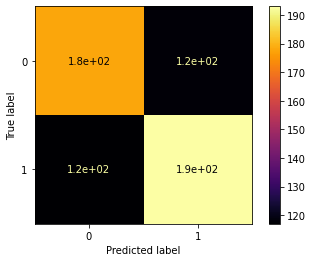

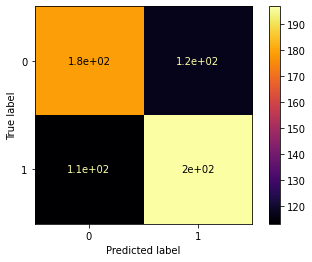

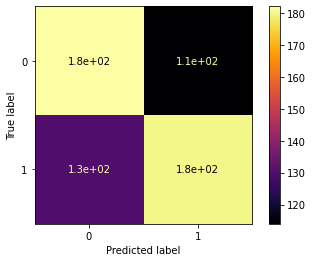

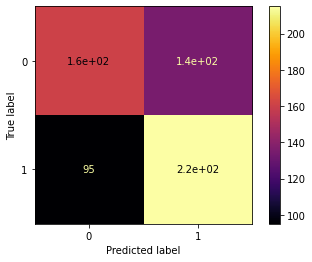

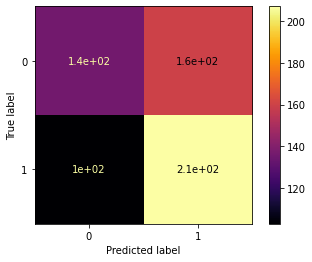

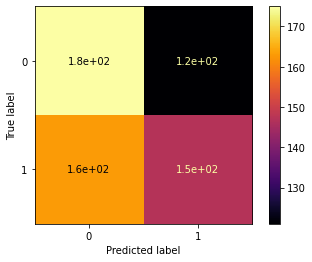

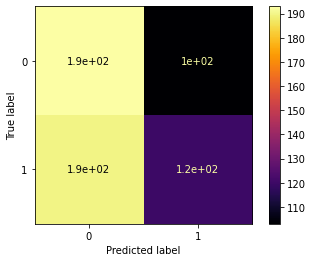

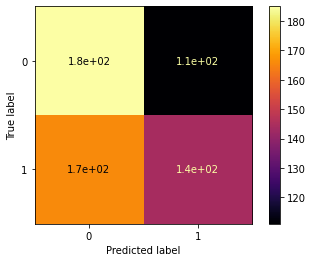

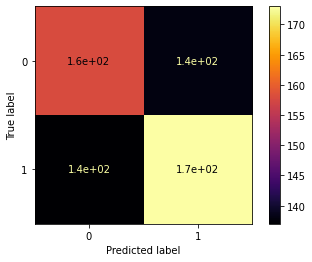

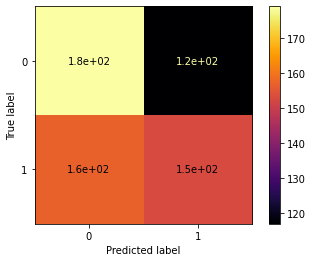

In [124]:
print(attributes_spotify.size)
print(attributes_spotify.target.size)

print(attributes_spotify.size/attributes_spotify.target.size)

for i in np.arange(2,int(attributes_spotify.size/attributes_spotify.target.size)-4):
  for j in np.arange(2,int(attributes_spotify.size/attributes_spotify.target.size)-4):
    if i!=j and i<j and i!=14 and j!=14:
      attributes=np.column_stack((attributes_spotify.iloc[:,i], attributes_spotify.iloc[:,j]))

      x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(attributes,attributes_spotify.target, test_size=0.3,random_state=42)
      print(np.sqrt(attributes_spotify.target.size))
      knn = neighbors.KNeighborsClassifier(n_neighbors=int(round(np.sqrt(attributes_spotify.target.size))))
      knn.fit(x_train,y_train)
      disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')

      #True Positive Rate
      sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

      #Positive Predicted Value
      presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

      #Accuracy
      exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

      #False Positive Rate
      fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

      print('Sensibilidad:', sensibilidad)
      print('Presicion:', presicion)
      print('Exactitud:', exactitud)
      print('Fall_out:', fall_out)
      print('')

      if sensibilidad>0.8 or presicion>0.8 or exactitud>0.8:
        print('Tiene propiedades cercanas a 1:',i,j)
    

En ninguno de los casos que junté de a pares los datos se obtienen buenas clasificaciones de los datos.

Analizando los datos indivudalmente no puede obtener un factor determinante para saber si a la persona le va a gustar una canción o no. Al analizar las propiedades de la canción de a pares tampoco se observa una correlación para predecir de manera correcta si la canción le va a gustar o no a la persona.

Y analizando los datos todos juntos, tampoco se puede predecir si a la persona le va a gustar o no la canción.